In [1]:
import pymc3 as pm
import sklearn_ardregression
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["font.size"] = 18

In [2]:
observed_xs, observed_ys = sklearn_ardregression.make_dataset(40) 
observed_xs, observed_ys = sklearn_ardregression.normalize(observed_xs, observed_ys) 
observed_xs = observed_xs.transpose(1, 0)

In [3]:
print(observed_xs.shape, observed_ys.shape)

(3, 40) (40,)


In [4]:
n_features = observed_xs.shape[0]

with pm.Model() as model:
    alphas = pm.HalfNormal("alphas", sd=1, shape=(n_features,))
    beta = pm.HalfNormal("beta", sd=1)
#     alphas = pm.HalfCauchy("alphas", beta=1, shape=(n_features,))
#     beta = pm.HalfCauchy("beta", beta=1)
    
    w = pm.Normal("w", mu=0.0, tau=alphas, shape=(n_features,))
    mu = 0
    for i in range(n_features):
        mu += w[i] * observed_xs[i] 
    print(mu.shape)
    z = pm.Normal("z", mu=mu, tau=beta, observed=observed_ys)
    trace = pm.sample(2000)

Shape.0


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [w, beta, alphas]
Sampling 2 chains: 100%|██████████| 5000/5000 [00:03<00:00, 1521.86draws/s]
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


In [5]:
pm.summary(trace).round(2)

/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:375: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  complex_result = (np.issubdtype(in1.dtype, complex) or
/Users/kumada/.pyenv/versions/anaconda3-5.0.1/lib/python3.6/site-packages/scipy/signal/signaltools.py:376: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  np.issubdtype(in2.dtype, complex))


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
w__0,0.57,0.09,0.00,0.40,0.75,3708.30,1.0
w__1,-0.06,0.09,0.00,-0.24,0.12,4017.12,1.0
w__2,0.73,0.09,0.00,0.56,0.90,3349.50,1.0
alphas__0,0.99,0.61,0.01,0.05,2.19,3943.89,1.0
alphas__1,1.06,0.64,0.01,0.05,2.29,4498.33,1.0
alphas__2,0.93,0.59,0.01,0.00,2.06,3585.90,1.0
beta,3.59,0.64,0.01,2.29,4.78,3952.91,1.0


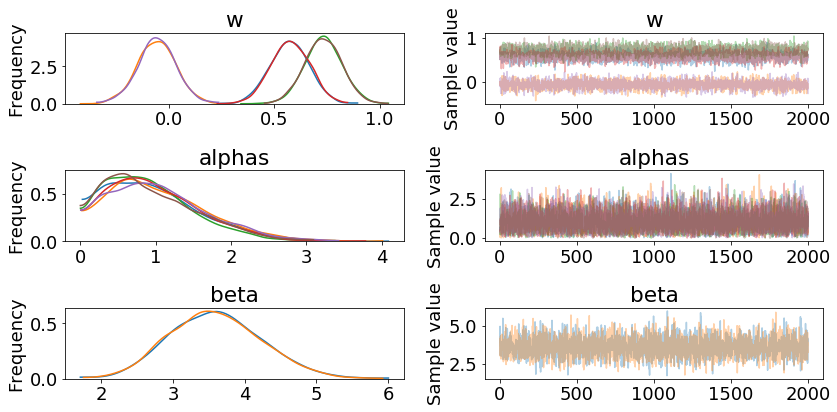

In [6]:
pm.traceplot(trace)
plt.show()

In [7]:
sample_size = trace["w"].shape
print(sample_size)

(4000, 3)


In [8]:
ppc = pm.sample_posterior_predictive(trace, samples=1000, model=model)

100%|██████████| 1000/1000 [00:00<00:00, 1760.39it/s]


In [9]:
ppc_z = ppc["z"]
ppc_z.shape

(1000, 40)

In [10]:
ppc_z_mean = np.mean(ppc_z, axis=0)
ppc_z_std = np.std(ppc_z, axis=0)
print(ppc_z_mean.shape)
print(ppc_z_std.shape)

(40,)
(40,)


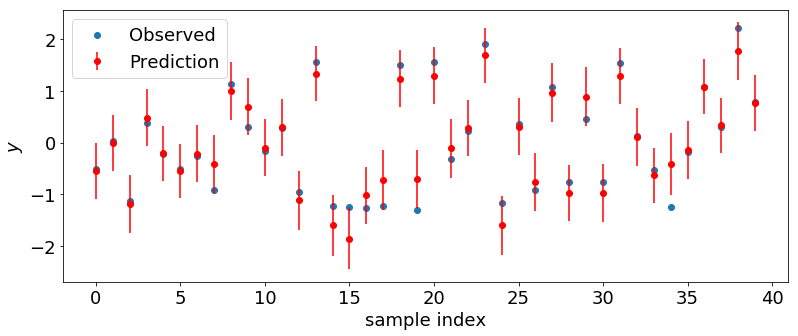

In [11]:
plt.figure(figsize=(13, 5))
xs = range(ppc_z_mean.shape[0])
plt.scatter(xs, observed_ys, marker="o", label="Observed")
# plt.plot(xs, ppc_z_mean, marker="o", label="Prediction")

plt.xlabel("sample index")
plt.ylabel("$y$")

plt.errorbar(xs, ppc_z_mean, ppc_z_std, fmt="ro", label="Prediction", marker="o")
plt.legend(loc="best")
plt.show()

In [12]:
# 相対誤差の平均値と標準偏差
abs_errors = np.abs(observed_ys- ppc_z_mean) / observed_ys
mean_abs_errors = np.mean(abs_errors)
std_abs_errors = np.std(abs_errors)
print("mean: {}, std: {}".format(mean_abs_errors, std_abs_errors))

mean: -0.018688418777321143, std: 0.41068649299754295


In [13]:
tw= trace["w"]
print(tw.shape)

(4000, 3)


In [14]:
tw_mean = np.mean(tw, axis=0)
tw_std = np.std(tw, axis=0)
print(tw_mean.shape)
print(tw_std.shape)

(3,)
(3,)


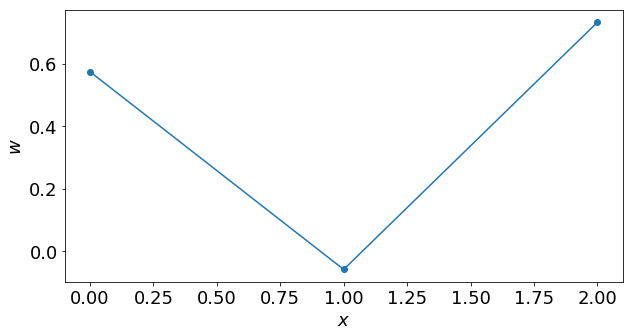

In [15]:
plt.figure(figsize=(10, 5))
xs = range(tw_std.shape[0])
plt.plot(xs, tw_mean, marker="o")

plt.xlabel("$x$")
plt.ylabel("$w$")

# plt.fill_between(xs, tw_mean - tw_std, tw_mean + tw_std, color='yellow', alpha=0.2)

plt.show()

In [16]:
for i, v in enumerate(tw_mean):
    print("[{:0>2}]: {}".format(i, v))

[00]: 0.5735050756629224
[01]: -0.05856176169145618
[02]: 0.731589550614368
